## Demonstrate simple x^2 function

In [1]:
from matplotlib import pyplot

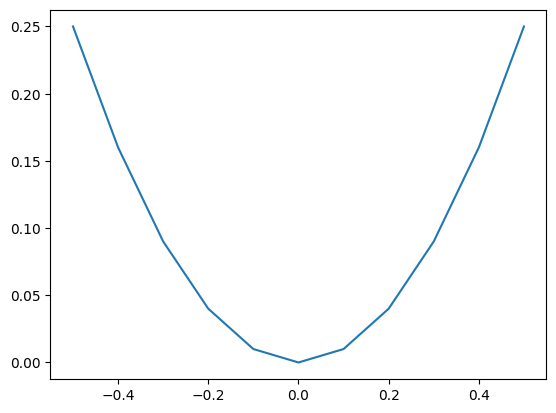

In [2]:


# simple function
def calculate(x):
 return x * x

# define inputs
inputs = [-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
# calculate outputs
outputs = [calculate(x) for x in inputs]
# plot the result
pyplot.plot(inputs, outputs)
pyplot.show()